In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [2]:
# The filtering based on hotspots.
filter_version = 'excluding'  # 'including', 'excluding', 'only'

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }#[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }#[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

# Import indels for 3 species

In [3]:
def get_indels(filter_version, alignment='chrM'):
    # File paths.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    # Test input.
    if filter_version not in INDEL_PREFIX.keys():
        ValueError('# Filter version not found')
    # The 3 species.
    list_species = ['mouse','macaque','human']
    # Combine indels for the three species.
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)
    return df_indels

df_indels = get_indels(filter_version, alignment)
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Individuals_Share
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,original,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423,1
1,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,original,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423,1
2,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,original,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423,1
3,chrM,9841,G,GT,SB=2.14678;AF=0.00152439;AC=0,SRR10068710,.:1:0.00152439:2.14678,mouse,1.0,0.001524,...,original,NaN,germline,Germline de novo,9841_G_GT,Unique to Individual,G133p3_9841,non-D-loop,15423,1
4,chrM,2454,TG,T,SB=1.67393;AF=0.00131406;AC=0,SRR10068715,.:1:0.00131406:1.67393,mouse,1.0,0.001314,...,original,NaN,somatic,Somatic de novo,2454_TG_T,Unique to Individual,G133p1_2454,non-D-loop,15423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,relin,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447,1
114,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,relin,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447,1
115,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,relin,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,1
116,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,relin,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447,1


# Histogram of indels along mtDNA

In [4]:
# D-loop coordinates in Mouse, Macaque, and Human.
def coordinates_dloop(species):
    if species == 'mouse':
        coords_dloop = [ [15424,16300] ]
        coords_non = [ [1,15423] ]
    elif species == 'macaque':
        coords_dloop = [ [1,535],[16015,16564] ]
        coords_non = [ [536,16014] ]
    elif species == 'human':
        coords_dloop = [ [1,576],[16024,16569] ]
        coords_non = [ [577,16023] ]
    else:
        ValueError("### Species not recognized ###")
    return { 'D-loop':coords_dloop , 'non-D':coords_non}

def size_of_marker(AC,intercept,exception):
    if AC > 20:
        return AC - exception
    else:
        return AC + intercept


## Plot

including


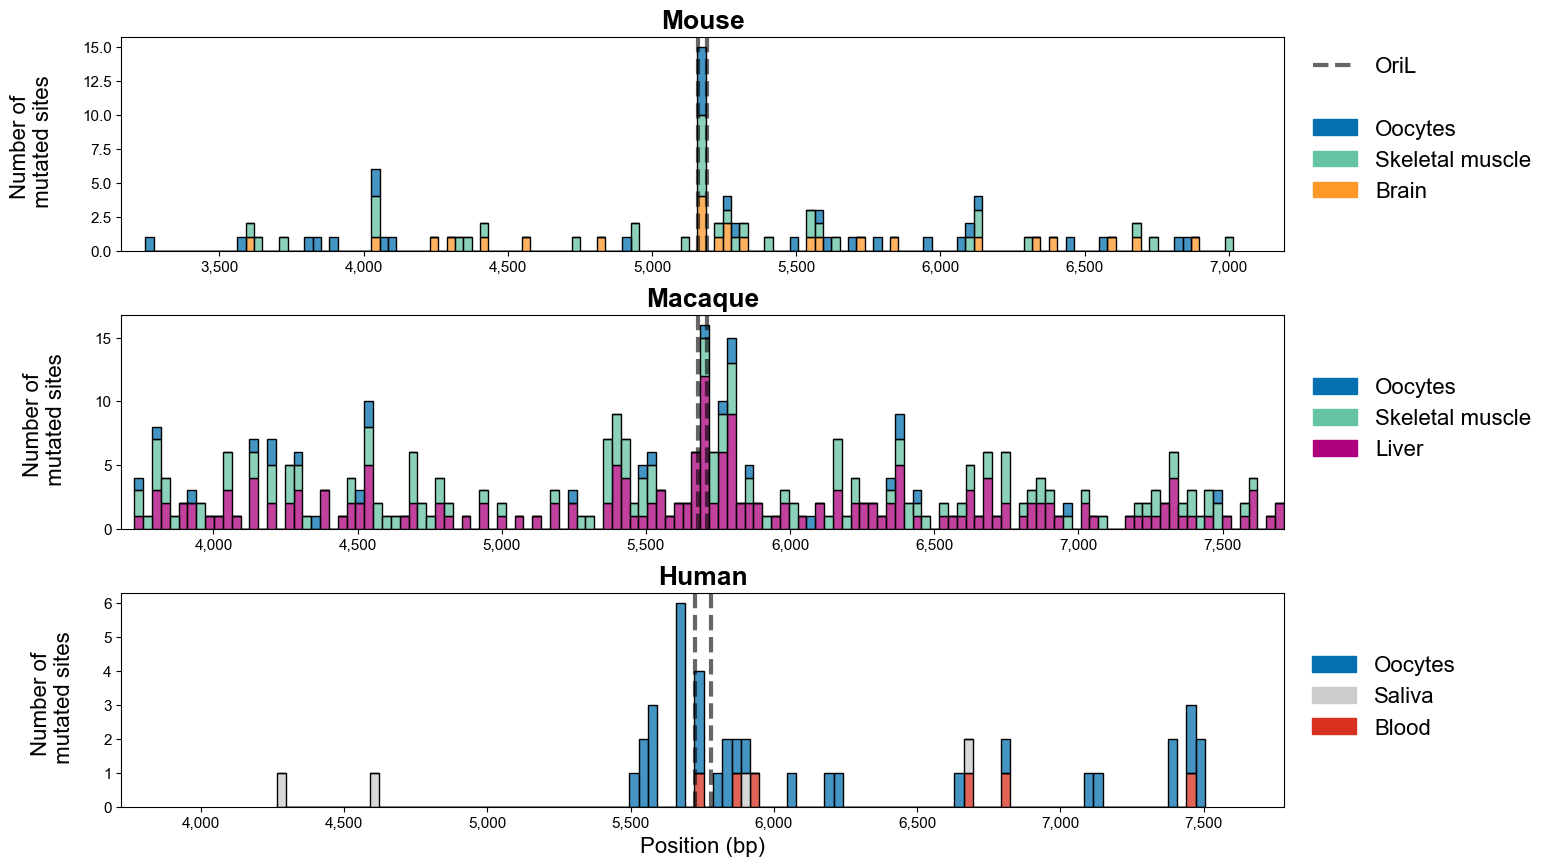

In [37]:
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def scale_marker_size(ac, unit=30):
    return unit * ac

def plot_maf_mutations(filter_version, alignment='chrM', write=True):
    # data = df_mutations.copy()
    data = get_indels(filter_version, alignment=alignment)

    data['Allele count'] = data['AC'].astype(int)
    data['Allele frequency'] = data['AF']
    
    # Seaborn parameters.
    gridspec = dict(hspace=0.3, height_ratios=[1, 1, 1])
    fig, axes = plt.subplots(3, 1, sharex=False, figsize=[15, 10], gridspec_kw=gridspec)

    # Compute the global maximum log-transformed AC for consistent scaling.
    all_AC = data['Allele count']
    global_max_ac_log = np.log10(all_AC + 1).max()

    # Pre-compute global sizes dictionary.
    global_sizes = {ac: scale_marker_size(ac) for ac in all_AC.drop_duplicates()}

    for i, (ax, species) in enumerate(zip(axes, ['mouse', 'macaque', 'human'])):
        # Filter by species.
        df = data[data['Species'] == species].copy()

        # Change names.
        dict_tissues = {
            'Oo': 'Oocytes', 'M': 'Skeletal muscle', 'Br': 'Brain',
            'Li': 'Liver', 'Sa': 'Saliva', 'Bl': 'Blood'
        }
        df['Tissue'] = df['Tissue'].map(dict_tissues)
        df['Species'] = df['Species'].str.capitalize()
    
        # Mutations only considered once.
        df = df.drop_duplicates(subset=['Species', 'Tissue', 'POS', 'REF', 'ALT'])

        # D-loop coordinates for species.
        coords = coordinates_dloop(species)['D-loop']

        # OriL coordinates.
        dict_coords_ori = {
            'mouse': [5160, 5191], 'macaque': [5681, 5713], 'human': [5723,5780]
        }
        coords_ori = dict_coords_ori[species]

        # Section of coordinates to show (oriL with flanks).
        flanks = 2000
        # flanks = 500
        df = df.loc[(df['POS'] >= coords_ori[0] - flanks) & (df['POS'] <= coords_ori[1] + flanks)]
        ax.set_xlim(coords_ori[0] - flanks, coords_ori[1] + flanks)
        # df = df.loc[(df['POS'] >= 3900) & (df['POS'] <= 6900)]
        # ax.set_xlim(3900, 6900)

        # HISTOGRAM
        sns.histplot(
            ax=ax, data=df, x="POS", hue="Tissue",
            hue_order=['Oocytes', 'Skeletal muscle', 'Brain', 'Liver', 'Saliva', 'Blood'],
            
            bins=130 if species != 'human' else 100,

            linewidth=1, multiple="stack",
            palette={
                'Oocytes': '#0570b0', 'Skeletal muscle': '#66c2a4',
                'Brain': '#fe9929', 'Liver': '#ae017e',
                'Blood': '#d7301f', 'Saliva': '#cccccc'
            },
            legend=None
        )

        # Vertical dashed lines for OriL.
        for j,coord in enumerate(coords_ori):
            if coord not in [1, 16300, 16564, 16569]:
                ax.axvline(x=coord, color="black", linestyle='--', linewidth=3, alpha=0.6)
            # if j == 1:
            #     ax.text(coord, ax.get_ylim()[1], 'OriL', color='black', fontsize=12, ha='right', va='bottom')

        legend_fontsize = 16

        # Change axis labels.
        ax.set_ylabel("Number of \n mutated sites\n", fontsize=legend_fontsize)
        ax.set_xlabel('')
        ax.tick_params(axis='both', labelsize=11)  # For both x and y ticks
        
        # Adjust axis limits.
        if "chrM" in alignment:
            if 'including' in filter_version:
                pass
            elif 'excluding' in filter_version:
                if species == 'human':
                    ax.set_ylim(0, 14)
            elif 'only' in filter_version:
                if species == 'human':
                    ax.set_ylim(0, 9)

        # Subplot titles.
        ax.set_title(species.capitalize(), weight="bold", size=19)

        def format_with_commas(x, _):
            return f"{int(x):,}"

        # Apply the formatter to the x-axis
        axes[i].set_xlabel('')
        axes[i].xaxis.set_major_formatter(FuncFormatter(format_with_commas))
        axes[-1].set_xlabel('Position (bp)', size=legend_fontsize)

    dict_palettes = {
        'Oocytes': '#0570b0', 'Skeletal muscle': '#66c2a4', 'Brain': '#fe9929',
        'Liver': '#ae017e', 'Blood': '#d7301f', 'Saliva': '#cccccc',
        'deletions': '#d7301f', 'insertions': '#2171b5'
    }


    # Add legend for the vertical dashed line representing OriL
    oriL_line = Line2D([0], [0], color='black', linestyle='--', linewidth=3, alpha=0.6, label='OriL')
    empty_patch = mpatches.Patch(color='white', label='')

    first_patch = mpatches.Patch(color=dict_palettes['Oocytes'], label='Oocytes')
    second_patch = mpatches.Patch(color=dict_palettes['Skeletal muscle'], label='Skeletal muscle')
    third_patch = mpatches.Patch(color=dict_palettes['Brain'], label='Brain')
    # axes[0].legend(handles=[first_patch, second_patch, third_patch], bbox_to_anchor=(1.2, 0.8), framealpha=0.0, fontsize=legend_fontsize)
    axes[0].legend(handles=[oriL_line, empty_patch, first_patch, second_patch, third_patch], bbox_to_anchor=(1.23, 1), framealpha=0.0, fontsize=legend_fontsize)

    first_patch = mpatches.Patch(color=dict_palettes['Oocytes'], label='Oocytes')
    second_patch = mpatches.Patch(color=dict_palettes['Skeletal muscle'], label='Skeletal muscle')
    third_patch = mpatches.Patch(color=dict_palettes['Liver'], label='Liver')
    axes[1].legend(handles=[first_patch, second_patch, third_patch], bbox_to_anchor=(1.23, 0.8), framealpha=0.0, fontsize=legend_fontsize)
    # axes[1].legend(handles=[first_patch, second_patch, third_patch, oriL_line], bbox_to_anchor=(1.2, 0.8), framealpha=0.0, fontsize=legend_fontsize)

    first_patch = mpatches.Patch(color=dict_palettes['Oocytes'], label='Oocytes')
    second_patch = mpatches.Patch(color=dict_palettes['Saliva'], label='Saliva')
    third_patch = mpatches.Patch(color=dict_palettes['Blood'], label='Blood')
    axes[2].legend(handles=[first_patch, second_patch, third_patch], bbox_to_anchor=(1.165, 0.8), framealpha=0.0, fontsize=legend_fontsize)
    # axes[2].legend(handles=[first_patch, second_patch, third_patch, oriL_line], bbox_to_anchor=(1.145, 0.8), framealpha=0.0, fontsize=legend_fontsize)


    print(filter_version)

    if write:
        fig_num = {'including': '4b', 'excluding': 'SX', 'only': 'SXX'}[filter_version]
        if filter_version == 'including':
            # Export as vectorized image.
            fig.savefig(f'plots/pdf/figure{fig_num}_histogram_OriL_{alignment}_{filter_version}Hotspots.pdf', bbox_inches='tight', format='pdf', dpi=1200)
            fig.savefig(f'plots/png/figure{fig_num}_histogram_OriL_{alignment}_{filter_version}Hotspots.png', bbox_inches='tight', format='png', dpi=1200)

# Call the function
plot_maf_mutations('including')

## Excluding hotspots

excluding


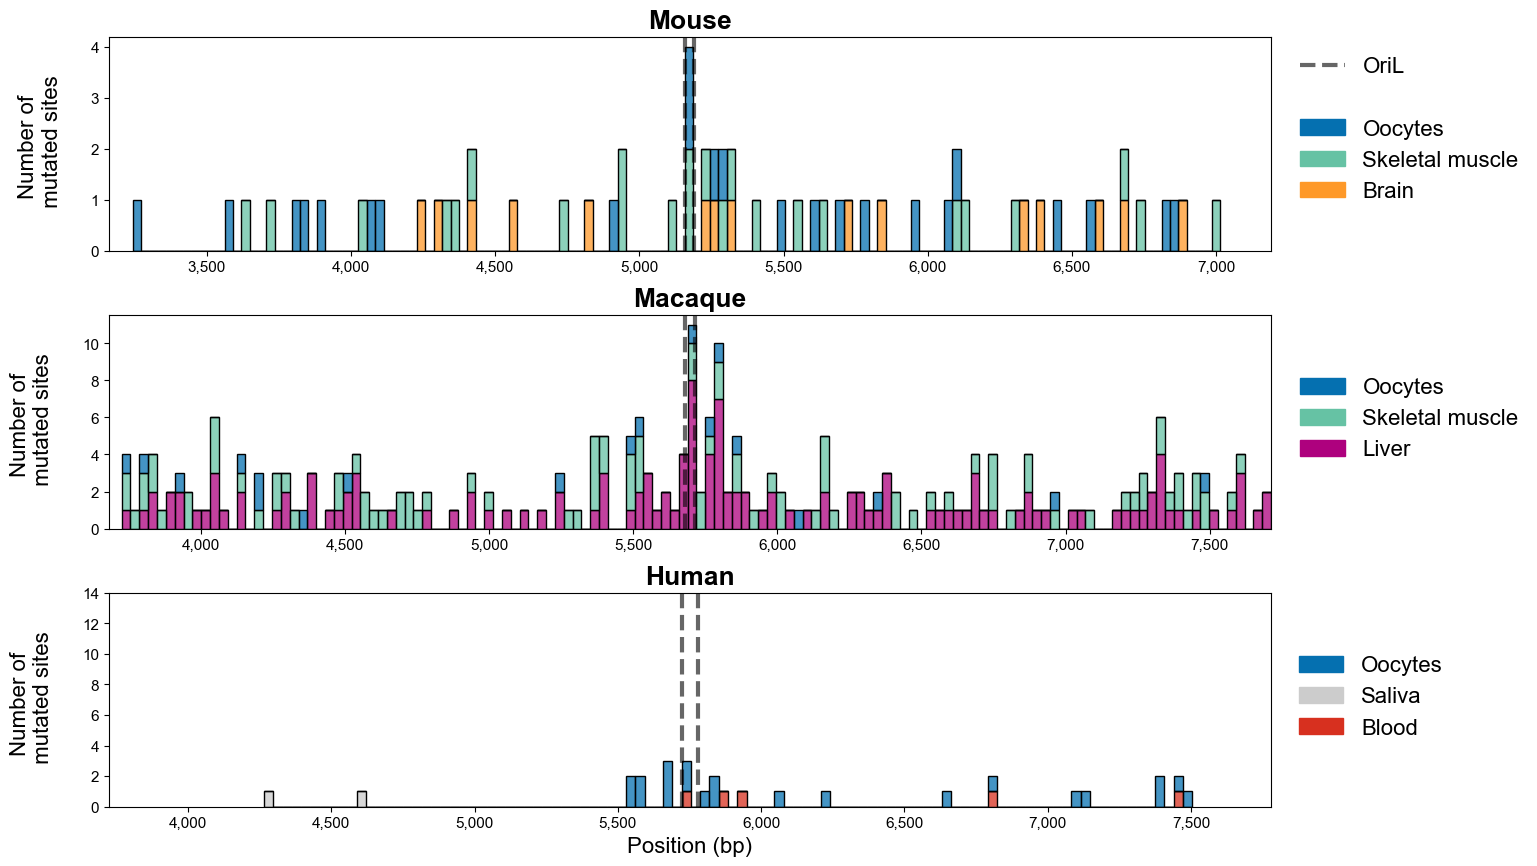

In [38]:
plot_maf_mutations('excluding')

## Only hotspots

only


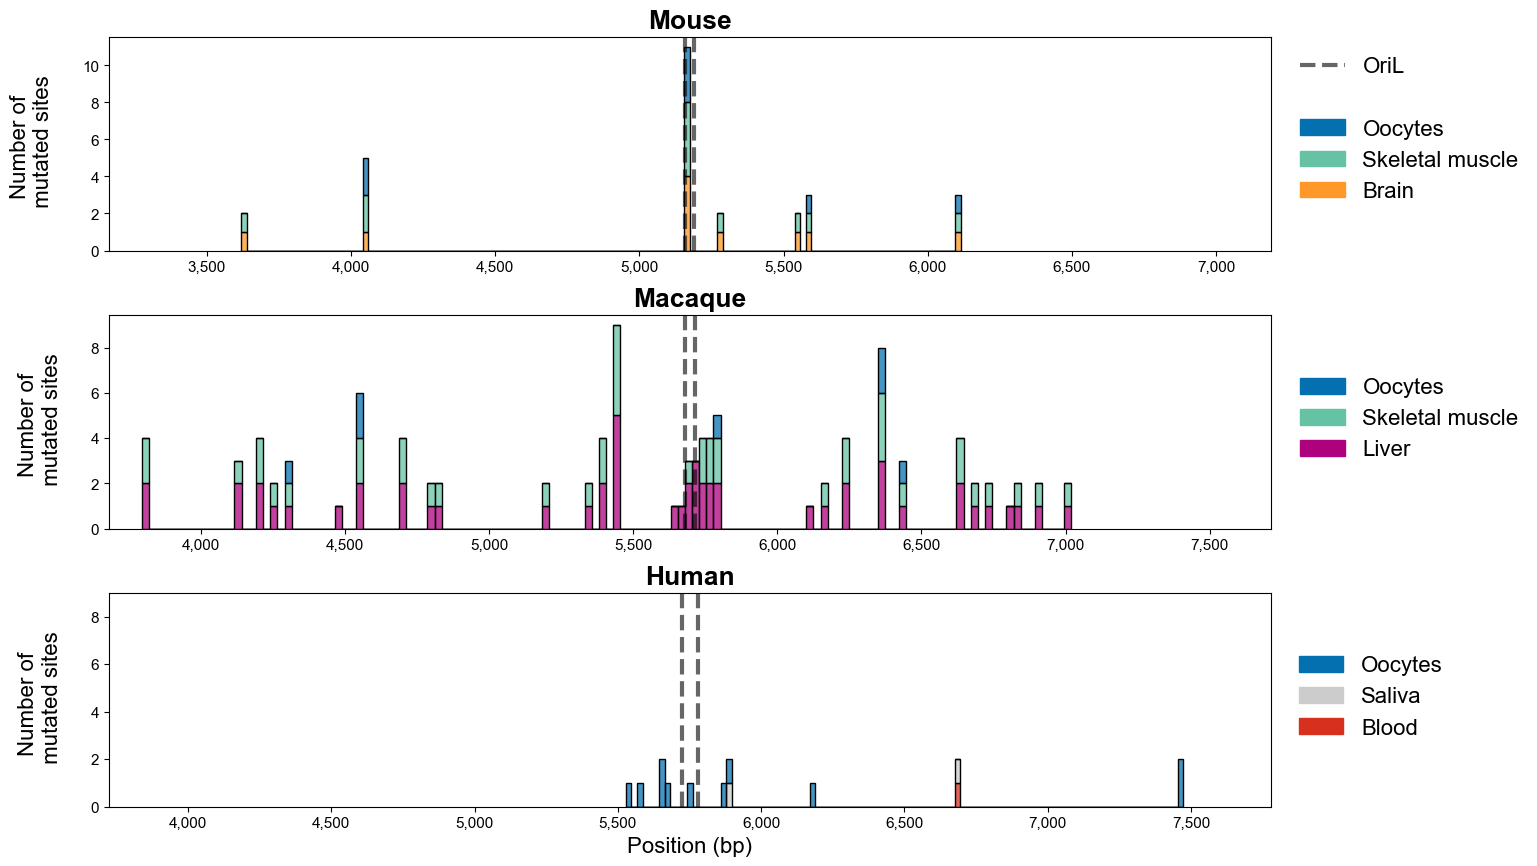

In [39]:
plot_maf_mutations('only')

In [40]:
df_indels[['Species','AC']].max()
df_indels[df_indels['AC']==2]
# df_indels[['Species','AF']].max()
# df_indels[df_indels['AF']>0.008]
df_indels[df_indels['POS']==954]

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Individuals_Share
115,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,relin,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,1


In [25]:
df_indels[(df_indels['POS']>200)&(df_indels['POS']<300)&(df_indels['Species']=='macaque')].sort_values('POS')

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Individuals_Share
1028,chrM,219,T,TCATGCTA,SB=2.38897;AF=0.000263713;AC=0,SRR16770769,.:1:0.000263713:2.38332,macaque,1.0,0.000264,...,relin,8384.0,somatic,Somatic de novo,219_T_TCATGCTA,NaN,Rh020_219,D-loop,1085,1
1029,chrM,246,A,AT,SB=2.4814;AF=0.000283206;AC=0,SRR16770973,.:1:0.000283206:2.4814,macaque,1.0,0.000283,...,relin,8411.0,somatic,Somatic de novo,246_A_AT,NaN,Rh081_246,D-loop,1085,1
1030,chrM,253,C,CCAACACCACA,SB=2.62771;AF=0.00124844;AC=0,SRR16770998,.:1:0.00124844:2.62771,macaque,1.0,0.001248,...,relin,8418.0,somatic,Somatic de novo,253_C_CCAACACCACA,NaN,Rh015_253,D-loop,1085,1
1031,chrM,253,C,CCAACA,SB=2.8152;AF=0.000286451;AC=0,SRR16770911,.:1:0.000286451:2.8152,macaque,1.0,0.000286,...,relin,8418.0,somatic,Somatic de novo,253_C_CCAACA,NaN,Rh029_253,D-loop,1085,1
1043,chrM,255,G,GACACC,SB=1.30781;AF=0.0450161;AC=0,SRR16770979,.:5:0.00287687:2.3487,macaque,5.0,0.002877,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACC,NaN,Rh074_255,D-loop,1085,2
1042,chrM,255,G,GACACC,SB=1.30781;AF=0.0450161;AC=0,SRR16770944,.:1:0.000763359:2.17498,macaque,1.0,0.000763,...,relin,8420.0,germline,Somatic de novo,255_G_GACACC,NaN,Rh086_255,D-loop,1085,2
1041,chrM,255,G,GACACCACACCACACCACACCACACCACACCACACC,SB=1.30781;AF=0.00154799;AC=0,SRR16770958,.:1:0.000324149:1.10519,macaque,1.0,0.000324,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACCACACCACACCACACCACACCACACCACACC,NaN,Rh083_255,D-loop,1085,2
1040,chrM,255,G,GACACCACACCACACCACACCACACCACACCACACCACACCACACC...,SB=2.26789;AF=0.000576701;AC=0,SRR16770828,.:1:0.00117096:2.26789,macaque,1.0,0.001171,...,relin,8420.0,germline,Germline de novo,255_G_GACACCACACCACACCACACCACACCACACCACACCACAC...,NaN,Rh104_255,D-loop,1085,2
1039,chrM,255,G,GACACCACACCACACCACACCACACCACACCACACCACACC,SB=1.1307;AF=0.00956938;AC=0,SRR16770912,.:1:0.000191718:0.866903,macaque,1.0,0.000192,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACCACACCACACCACACCACACCACACCACACCACACC,NaN,Rh029_255,D-loop,1085,1
1038,chrM,255,G,GACACCACATCACACC,SB=0.866903;AF=0.000191718;AC=0,SRR16770912,.:1:0.000191718:0.866903,macaque,1.0,0.000192,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACCACATCACACC,NaN,Rh029_255,D-loop,1085,1


In [26]:
df_indels['Mutation_ID'].value_counts()

Mutation_ID
7920_CA_C      3
13869_AAC_A    2
6162_C_CT      2
5783_TA_T      2
9217_CT_C      2
              ..
8265_TA_T      1
7826_TC_T      1
7605_AC_A      1
7596_CT_C      1
991_TA_T       1
Name: count, Length: 1300, dtype: int64